In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as st
from scipy import stats
import statistics
from sklearn.metrics import confusion_matrix
from plotly import tools
# import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

In [45]:
df = pd.read_excel('/content/drive/MyDrive/DSEB_61/Risk /bankloans.xlsx' , sheet_name = 'Data' , engine='openpyxl')

In [46]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [47]:
name = list(df.columns)
new_name = []
for i in name:
  i = i.lower()
  if len(i) >= 2:
    i = i.replace(" ", "_")
  new_name.append(i)
new_name

['id',
 'age',
 'experience',
 'income',
 'zip_code',
 'family',
 'ccavg',
 'education',
 'mortgage',
 'personal_loan',
 'securities_account',
 'cd_account',
 'online',
 'creditcard']

In [48]:
df.columns = new_name

In [49]:
df.head(2)

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [50]:
df = df.replace({'personal_loan': {0: "No", 1: "Yes"}})

In [51]:
df.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,1.6,1,0,No,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,No,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,No,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,No,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,No,0,0,0,1


In [52]:
df.describe()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,securities_account,cd_account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [53]:
df.isnull().sum()

id                    0
age                   0
experience            0
income                0
zip_code              0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

#EDA

In [54]:
avg_age = df["age"].mean()
print ("The average age of this dataset is {:.1f}.".format(avg_age))

The average age of this dataset is 45.3.


In [55]:
sum(df["personal_loan"] == "Yes")

480

In [56]:
sum(df["personal_loan"] == "No")

4520

In [57]:
percent_cc = sum(df["creditcard"] == 1)/len(df)
print ("The percentage of customers that own the bank's credit card is {:.2%}.".format(percent_cc))

The percentage of customers that own the bank's credit card is 29.40%.


In [58]:
percent_loan = sum(df["personal_loan"] == "Yes")/len(df)
print ("The percentage of customers that took out a personal loan is {:.2%}.".format(percent_loan))

The percentage of customers that took out a personal loan is 9.60%.


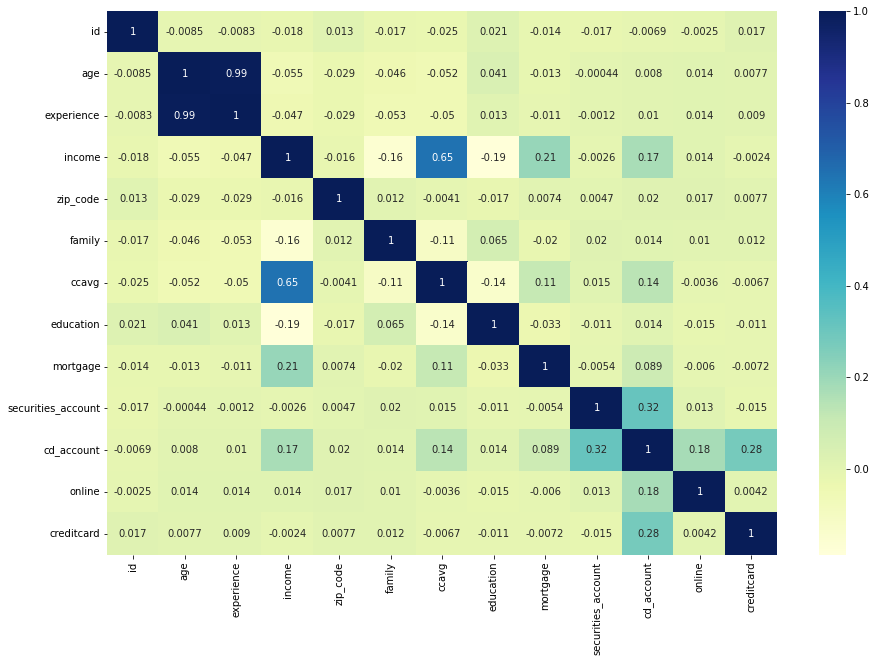

In [59]:
cm = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.savefig('heatmap.png', facecolor='w',bbox_inches='tight')
plt.show()

Personal Loan

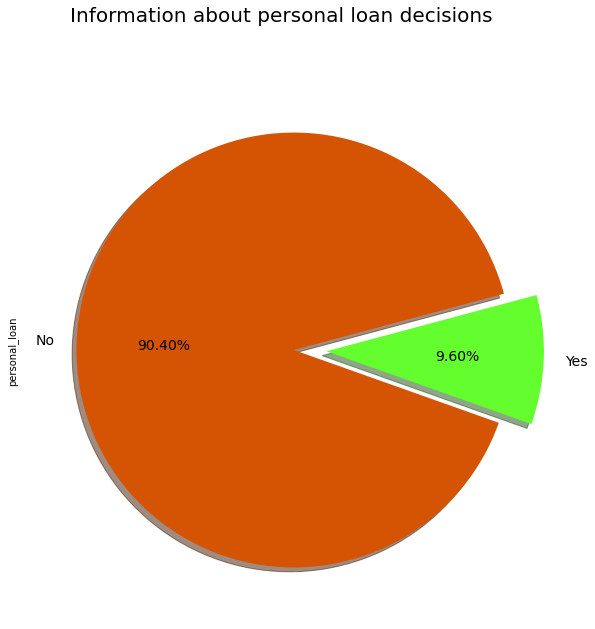

In [60]:
f, ax = plt.subplots(figsize=(10,10))

colors = ["#d45404", "#64FE2E"]
labels ='No', 'Yes'

plt.suptitle('Information about personal loan decisions ', fontsize=20)

df['personal_loan'].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, 
                                             labels=labels, fontsize=14, startangle=15)


In [61]:
# lets create 2 dataframes: one with personal loans and one without personal loans
personal_loans = df[df['personal_loan'] == "Yes"].copy()
no_personal_loans = df[df['personal_loan'] == "No"].copy()

In [62]:
personal_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
id,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.00,4981.0
age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.00,65.0
experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.00,41.0
income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.00,203.0
zip_code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.50,96008.0
family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.00,4.0
ccavg,480.0,3.905347,2.097679,0.0,2.60,3.8,5.35,10.0
education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.00,3.0
mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.50,617.0
securities_account,480.0,0.125000,0.331064,0.0,0.00,0.0,0.00,1.0


In [63]:
no_personal_loans.describe().T


,count,mean,std,min,25%,50%,75%,max
id,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
experience,4520.0,20.132301,11.456672,-3.0,10.00,20.0,30.00,43.0
income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
zip_code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
ccavg,4520.0,1.728982,1.567654,0.0,0.60,1.4,2.30,8.8
education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
securities_account,4520.0,0.102212,0.302961,0.0,0.00,0.0,0.00,1.0


Family

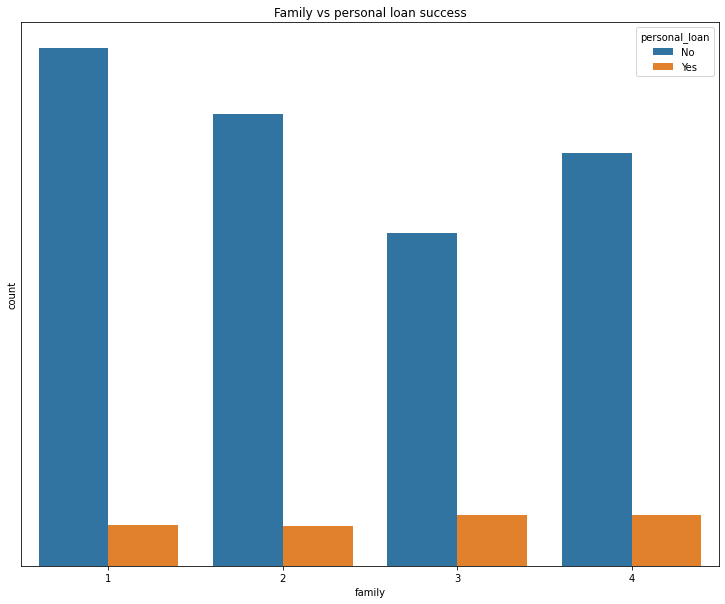

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(12.5, 10), sharey=True)
sns.countplot(ax=axes, x= 'family', hue = 'personal_loan', data=df)
axes.set_title('Family vs personal loan success')
plt.yticks([])
plt.show()

Experience

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



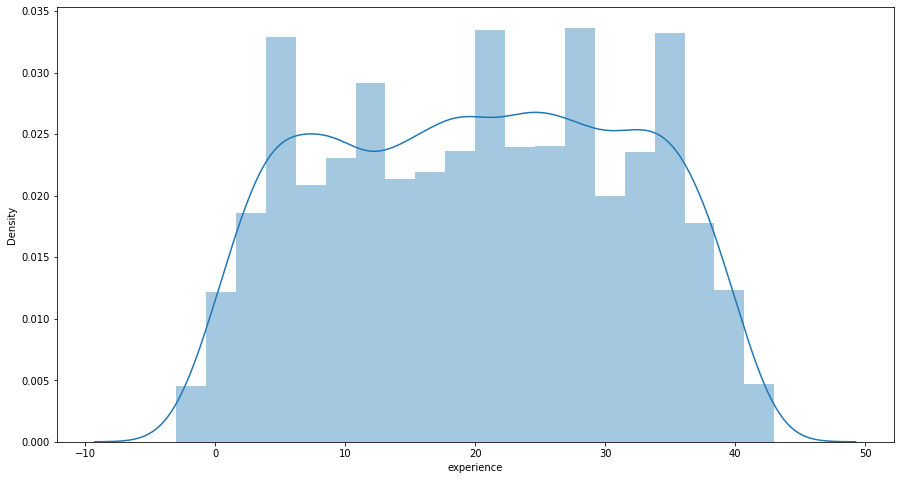

In [65]:
# lets look at the distribution of experience
plt.figure(figsize=(15,8))
sns.distplot(df["experience"])
plt.show()

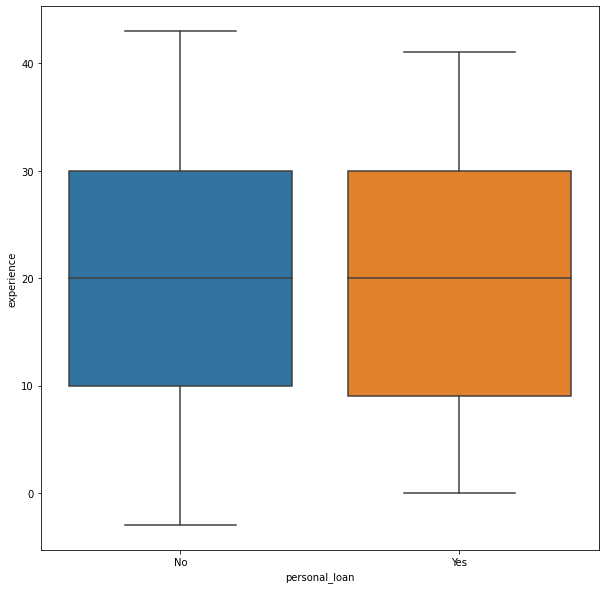

In [66]:
f, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x = df["personal_loan"], y = df['experience'])
plt.show()

Mortgage

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



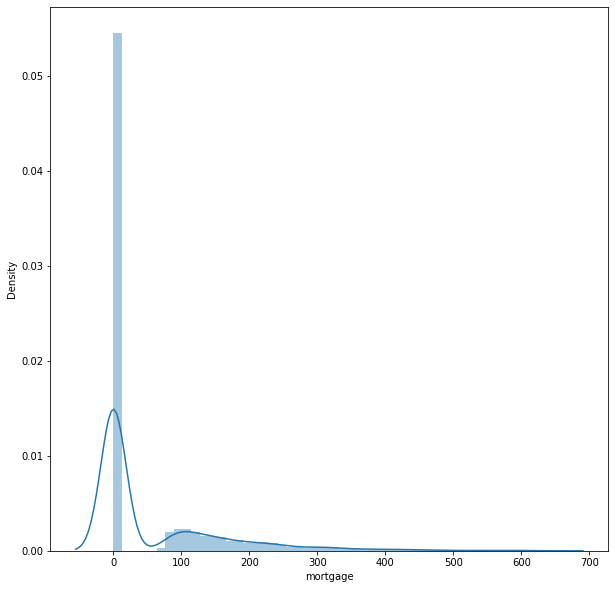

In [67]:
plt.figure(figsize=(10,10))
sns.distplot(df["mortgage"])
plt.show()

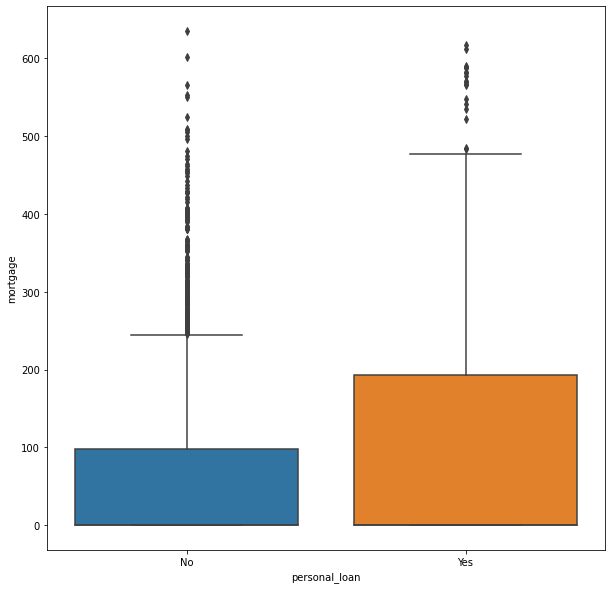

In [68]:
f, ax = plt.subplots(figsize=(10,10))

sns.boxplot(x = df["personal_loan"], y = df['mortgage'])
plt.show()

Zip Code

In [69]:
#top 15 regions where customers are existing
df['zip_code'].value_counts()[:15]

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90024     50
90245     50
90089     46
91330     46
Name: zip_code, dtype: int64

Age

In [70]:
df['age_grp'] = pd.cut(df.age, bins=[23, 25, 35, 50, 60, 100], labels=['(23, 25]', '(25, 35]', '(35, 50]', '(50, 60]', '60+'])
df.head()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,age_grp
0,1,25,1,49,91107,4,1.6,1,0,No,1,0,0,0,"(23, 25]"
1,2,45,19,34,90089,3,1.5,1,0,No,1,0,0,0,"(35, 50]"
2,3,39,15,11,94720,1,1.0,1,0,No,0,0,0,0,"(35, 50]"
3,4,35,9,100,94112,1,2.7,2,0,No,0,0,0,0,"(25, 35]"
4,5,35,8,45,91330,4,1.0,2,0,No,0,0,0,1,"(25, 35]"


In [71]:
age_grp_org = pd.DataFrame(df.groupby('age_grp').personal_loan.value_counts()).rename(columns={'personal_loan': 'cnt'})
age_grp_y = age_grp_org.groupby(['age_grp', 'personal_loan']).agg({'cnt': 'sum'})

age_grp_org['percentage'] = age_grp_y.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).round(2)
age_grp_org = age_grp_org.reset_index()
age_grp_org

,age_grp,personal_loan,cnt,percentage
0,"(23, 25]",No,81,100.00
1,"(25, 35]",No,1047,88.65
2,"(25, 35]",Yes,134,11.35
3,"(35, 50]",No,1684,90.73
4,"(35, 50]",Yes,172,9.27
5,"(50, 60]",No,1208,91.31
6,"(50, 60]",Yes,115,8.69
7,60+,No,488,89.21
8,60+,Yes,59,10.79


In [72]:
fig = px.bar(data_frame=age_grp_org, x='age_grp', y='cnt', barmode='group', color='personal_loan', text='percentage', width=1000,
    height=400)
fig.show(renderer="colab")

In [73]:
df_accept = df[df.personal_loan == 'Yes']

In [74]:
age_grp = pd.DataFrame(df_accept.age_grp.value_counts()).reset_index()
age_grp.columns = ['age_grp', 'count']
age_grp['percentage'] = age_grp['count'].apply(lambda x: 100 * x / sum(age_grp['count']))
age_grp = age_grp.sort_values(by='count', ascending=False).round(2)
age_grp.head()

,age_grp,count,percentage
0,"(35, 50]",172,35.83
1,"(25, 35]",134,27.92
2,"(50, 60]",115,23.96
3,60+,59,12.29
4,"(23, 25]",0,0.00


In [75]:
fig = px.bar(data_frame=age_grp, x='age_grp', y='count', color='count', text='percentage')
fig.update_layout(showlegend=False)
fig.show(renderer="colab")

Education

In [76]:
df = df.replace({'education': {1: "Bachelor", 2: "Master", 3: "Advanced Degree"}})

In [77]:
edu_grp = pd.DataFrame(df.education.value_counts()).reset_index().rename(columns={'index': 'education', 'education': 'count'})
edu_grp['percentage'] = edu_grp['count'].apply(lambda x: 100 * x / sum(edu_grp['count'])).round(2)
edu_grp

,education,count,percentage
0,Bachelor,2096,41.92
1,Advanced Degree,1501,30.02
2,Master,1403,28.06


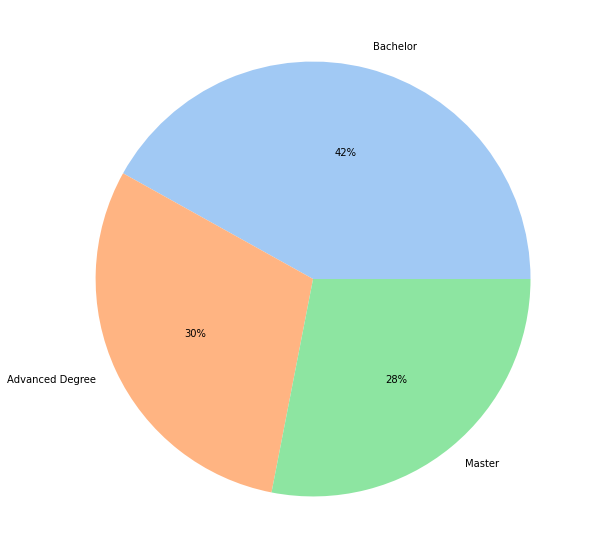

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))

colors = sns.color_palette('pastel')[0:5]

plt.pie(edu_grp['count'], labels = edu_grp.education, colors = colors, autopct='%.0f%%')
plt.show()

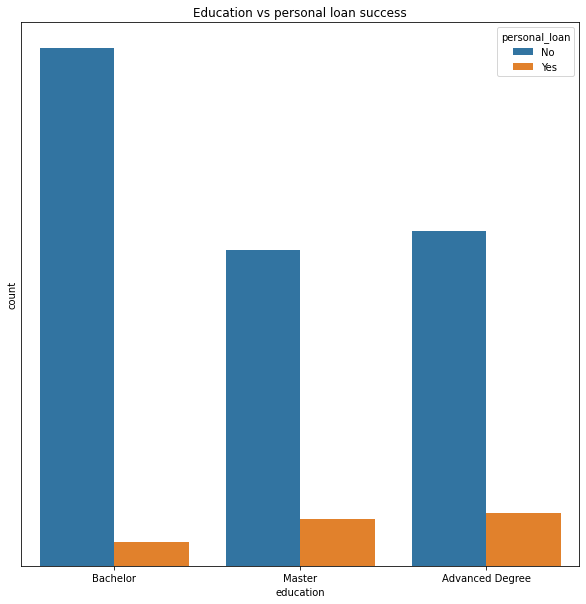

In [79]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharey=True)
sns.countplot(ax=axes, x= 'education', hue = 'personal_loan', data=df)
axes.set_title('Education vs personal loan success')
plt.yticks([])
plt.show()

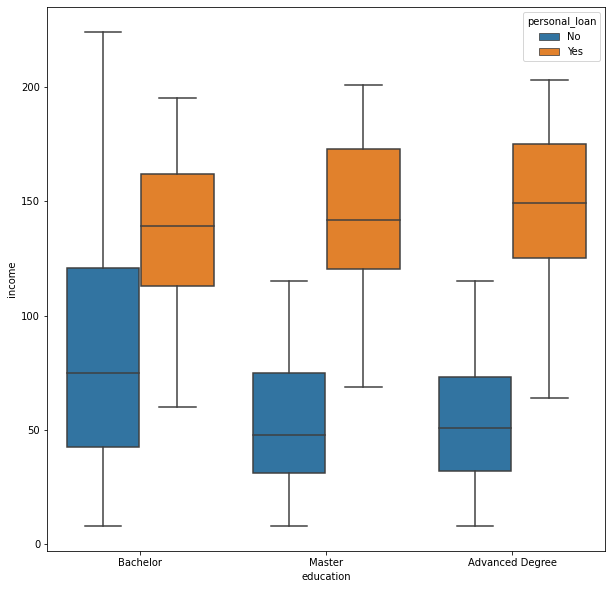

In [80]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x='education',y='income',hue='personal_loan',data=df)


Others

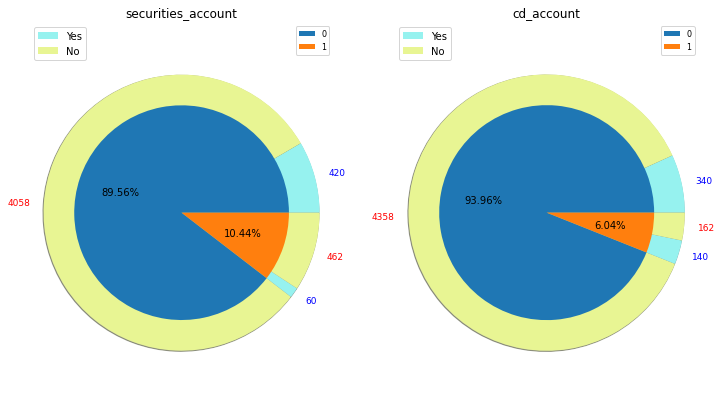

In [81]:
f, axes = plt.subplots(1,2, figsize=(12,7), sharey = True) 
num_col = ['securities_account', 'cd_account']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []  
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['personal_loan'] == 'Yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(1,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#96f2ef','#e8f593'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

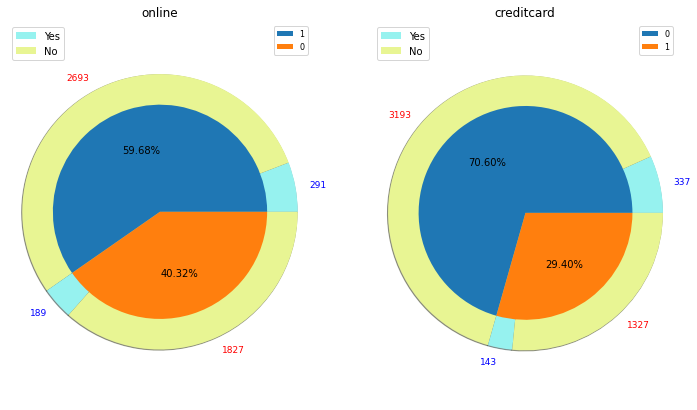

In [82]:
f, axes = plt.subplots(1,2, figsize=(12,7), sharey = True) 
num_col = ['online', 'creditcard']

for j,col in enumerate(num_col):
    cols = df[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []  
    for pop in pop_types: 
        size = len(df[df[col] == pop].index)
        edibles = len(df[(df[col] == pop) & (df['personal_loan'] == 'Yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(1,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#96f2ef','#e8f593'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

Income


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



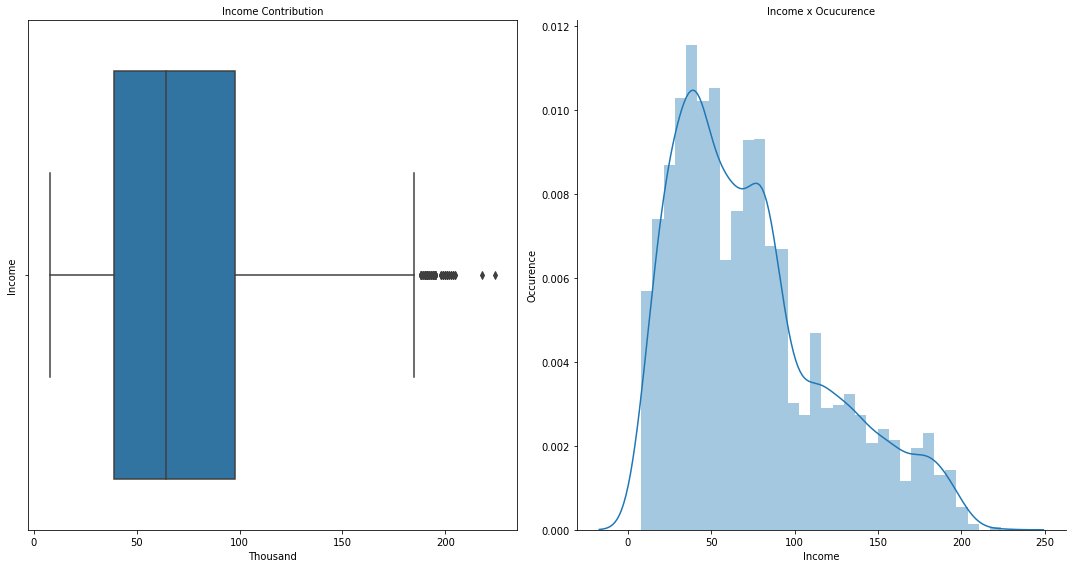

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))
sns.boxplot(x = 'income', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Thousand', fontsize=10)
ax1.set_ylabel('Income', fontsize=10)
ax1.set_title('Income Contribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['income'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Income', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Income x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [84]:
q1 = df['income'].quantile(q = 0.25)
q2 = df['income'].quantile(q = 0.50)
q3 = df['income'].quantile(q = 0.75)
print('Quartile 1: ', q1)
print('Quartile 2: ', q2)
print('Quartile 3: ', q3)

Quartile 1:  39.0
Quartile 2:  64.0
Quartile 3:  98.0


In [85]:
print('Duration calls above: ', q3 + 1.5*(q3 - q1), 'are outliers')

Duration calls above:  186.5 are outliers


In [86]:
print('Numerber of outliers: ', df[df['income'] > 200]['income'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['income'] > 200]['income'].count()*100/len(df),2), '%')

Numerber of outliers:  16
Number of clients:  5000
Outliers are: 0.32 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



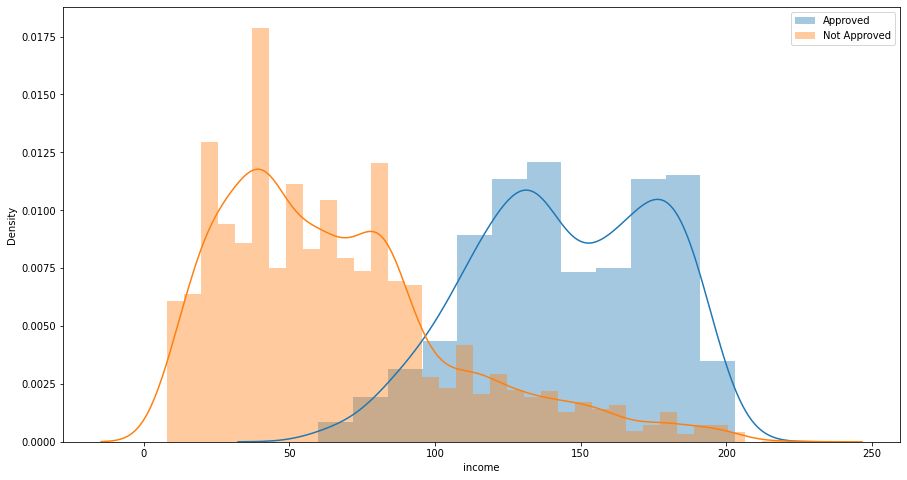

In [87]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["income"], label='Approved')
sns.distplot(no_personal_loans["income"], label='Not Approved')
plt.legend()
plt.savefig('approved_not_approved.png', facecolor='w', bbox_inches='tight')
plt.show()

CCAvg

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



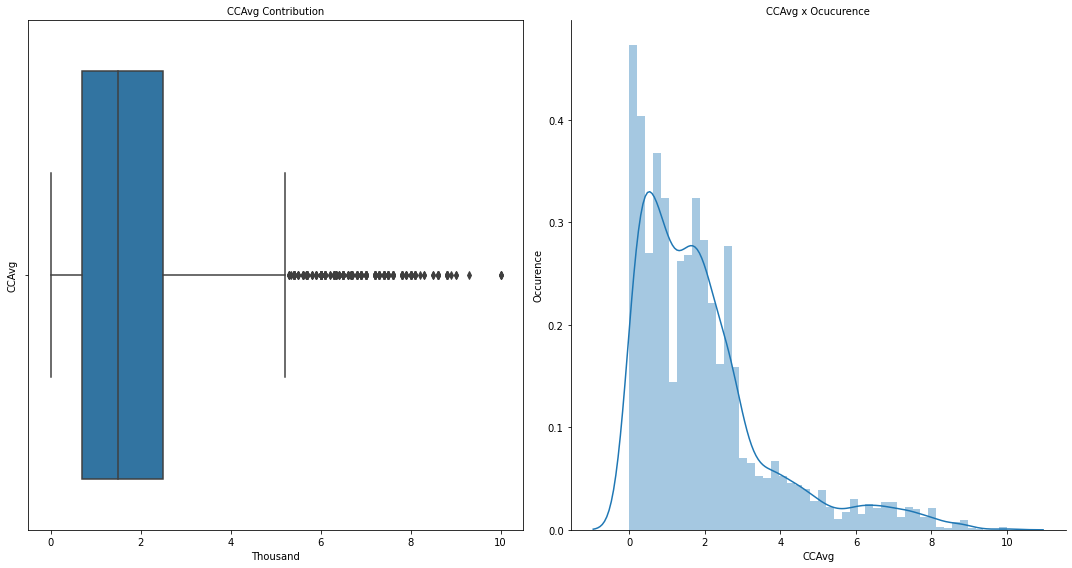

In [88]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))
sns.boxplot(x = 'ccavg', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Thousand', fontsize=10)
ax1.set_ylabel('CCAvg', fontsize=10)
ax1.set_title('CCAvg Contribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['ccavg'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('CCAvg', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('CCAvg x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [89]:
q1 = df['ccavg'].quantile(q = 0.25)
q2 = df['ccavg'].quantile(q = 0.50)
q3 = df['ccavg'].quantile(q = 0.75)
print('Quartile 1: ', q1)
print('Quartile 2: ', q2)
print('Quartile 3: ', q3)

Quartile 1:  0.7
Quartile 2:  1.5
Quartile 3:  2.5


In [90]:
print('Duration calls above: ', q3 + 1.5*(q3 - q1), 'are outliers')

Duration calls above:  5.2 are outliers


In [91]:
print('Numerber of outliers: ', df[df['ccavg'] > 7.5]['ccavg'].count())
print('Number of clients: ', len(df))
print('Outliers are:', round(df[df['ccavg'] > 7.5]['ccavg'].count()*100/len(df),2), '%')

Numerber of outliers:  73
Number of clients:  5000
Outliers are: 1.46 %


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



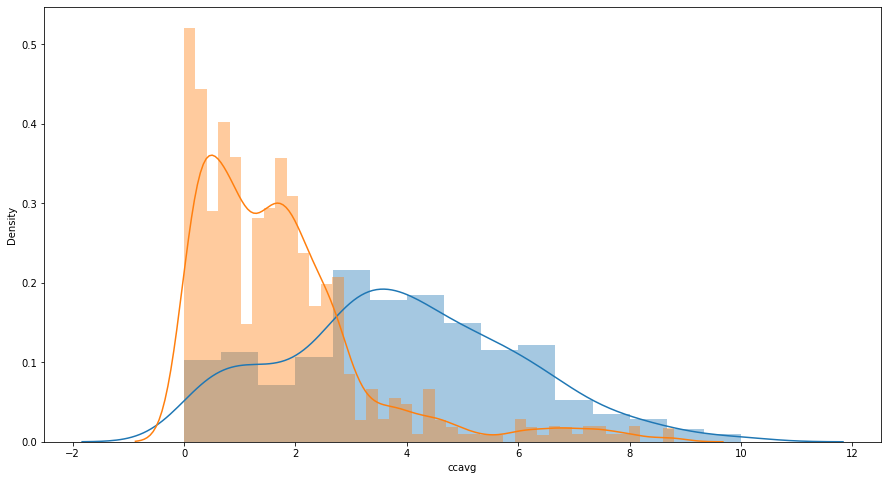

In [92]:
plt.figure(figsize=(15,8))
sns.distplot(personal_loans["ccavg"])
sns.distplot(no_personal_loans["ccavg"])
plt.show()

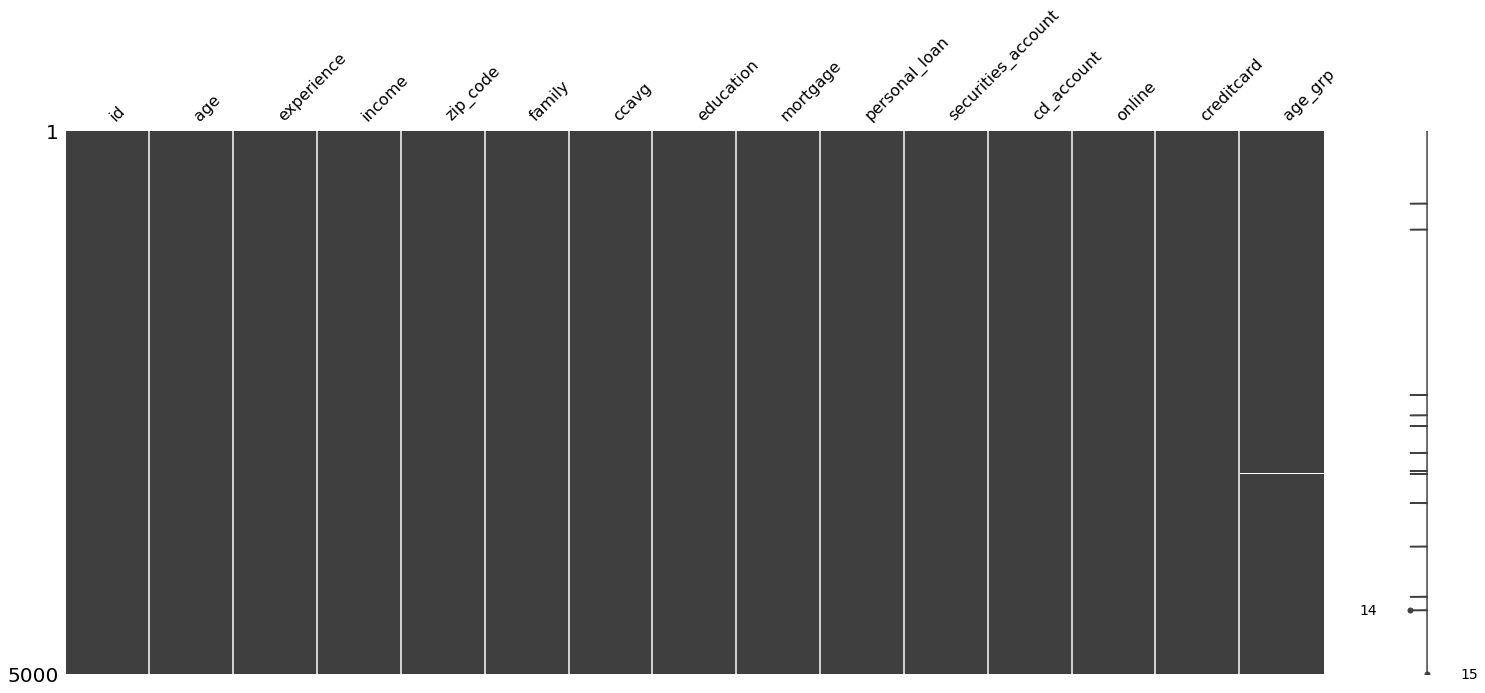

In [95]:
import missingno as msno

#cleaning
msno.matrix(df)

In [96]:
#majority are in age between 30 - 35 & 55-60
#experience betweeen 20 to 30 years 
#income are between 35-50 k ayear
#family size majority is 1 or 2
# credit card spending average majoriy between 0 to 2k a month
#customers majority are undergraduate--thats why their spending is not so much
#mortagage between 0-50 majority
#majority did not accept bank's personal loan -- this expected because of low mortagage and a low cc spending i think
#majority of customers are not having securities accounts nor cd accounts
#usage of online banking is so hiegh here 
#credit cards issued are not used so much

In [97]:
#feature engineering

In [98]:
#age and experience are so refelecting on each other - naturally explains itself
#more income you have , the more cc average increases
#more income customer has , the more he will accept the loan
#the more cc average is rasing, the more customer will accept the personal loan

#Preprocessing + Models


In [99]:
#ML - clustering

In [100]:
#starting with normalization or standarization so we can optain better clusters
df_dummies = pd.get_dummies(df.drop('id',axis = 1))
scaler = MinMaxScaler()
df_scalled = scaler.fit_transform(df_dummies)

In [101]:
df_scalled

array([[0.04545455, 0.08695652, 0.18981481, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.47826087, 0.12037037, ..., 1.        , 0.        ,
        0.        ],
       [0.36363636, 0.39130435, 0.01388889, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.90909091, 0.91304348, 0.07407407, ..., 0.        , 0.        ,
        1.        ],
       [0.95454545, 0.93478261, 0.18981481, ..., 0.        , 0.        ,
        1.        ],
       [0.11363636, 0.15217391, 0.34722222, ..., 0.        , 0.        ,
        0.        ]])

In [102]:
sse_array = []
for k_value in range(1,21):
    model = KMeans(n_clusters = k_value)
    model.fit_predict(df_scalled)
    sse_array.append(model.inertia_)
    print('k_value: ' + str(k_value) + ' sse value :' + str(model.inertia_))

k_value: 1 sse value :12638.571714457197
k_value: 2 sse value :10919.53190463693
k_value: 3 sse value :9303.931234045052
k_value: 4 sse value :8528.33342983286
k_value: 5 sse value :7840.067432023839
k_value: 6 sse value :7370.3826929420975
k_value: 7 sse value :6862.00986239761
k_value: 8 sse value :6450.6476364737355
k_value: 9 sse value :6050.319675356099
k_value: 10 sse value :5630.667644035632
k_value: 11 sse value :5432.579311742513
k_value: 12 sse value :5207.473975017338
k_value: 13 sse value :4965.375581499581
k_value: 14 sse value :4875.67182599546
k_value: 15 sse value :4741.401154004967
k_value: 16 sse value :4598.329917573869
k_value: 17 sse value :4447.688398954408
k_value: 18 sse value :4356.618747588538
k_value: 19 sse value :4198.3428508144225
k_value: 20 sse value :4073.8139721271746


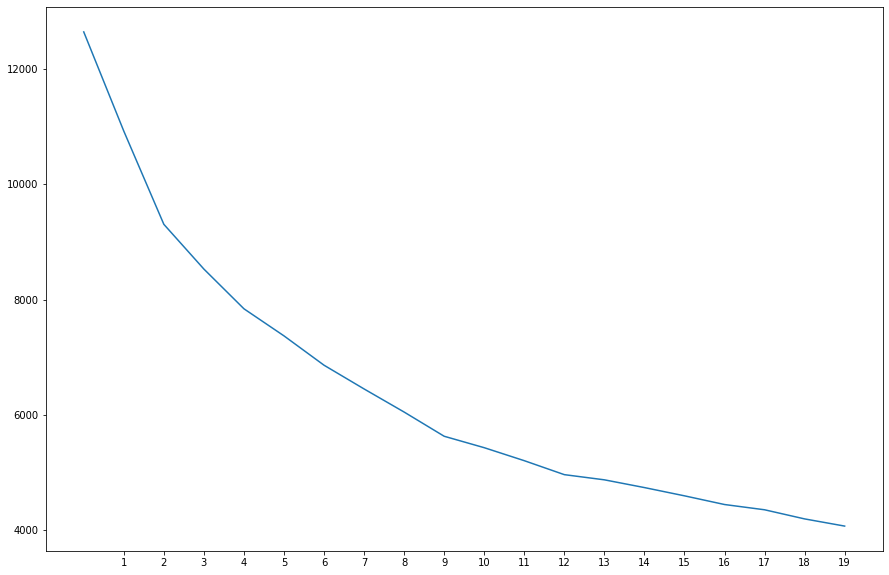

In [103]:
plt.figure(figsize=(15,10))

plt.xticks(list(range(1,21)))
plt.plot(sse_array)

In [104]:
km_model = KMeans(5)
y_predicted = km_model.fit_predict(df_scalled)
df['cluster'] = y_predicted

In [105]:
df.groupby('cluster').count()

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard,age_grp
cluster,,,,,,,,,,,,,,,
0,851,851,851,851,851,851,851,851,851,851,851,851,851,851,844
1,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,1038
2,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
3,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195
4,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181,1181


In [106]:
#now that we have 5 cluster we can seperate each of them and start understand what is the carchteristics of 
#each cluster and name it accordigly

In [107]:
#using lazy predictor to predict accepting the personal loan

In [108]:
df = df.replace({'personal_loan': { "No" : 0, "Yes" : 1}})
df = df.replace({'education': {"Bachelor" :1,  "Master" :2, "Advanced Degree": 3}})

In [109]:
!pip install imbalanced-learn

In [110]:
import imblearn
print(imblearn.__version__)

0.8.1


In [111]:
X = df.drop(['id' , 'personal_loan', 'age_grp' ]  , axis = 1)
y = df['personal_loan']

In [112]:
counter = Counter(df.personal_loan)
print(counter)

Counter({0: 4520, 1: 480})


In [113]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [114]:
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [115]:
counter = Counter(y)
print(counter)

Counter({0: 4520, 1: 2260})


In [116]:
x_train , x_test , y_train , y_test = train_test_split(pd.get_dummies(X) , y , test_size = 0.2 , random_state = 42)

XGBClassifier

In [117]:
clf = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [118]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [119]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

In [120]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f306f122c50>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [121]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([4.96077291, 9.27655975, 8.40310613, 6.83689475, 7.38849998]), 'std_fit_time': array([0.16464287, 0.61120234, 0.03394252, 0.08801163, 0.14473595]), 'mean_score_time': array([0.0762039 , 0.17001613, 0.17152691, 0.12244089, 0.10588956]), 'std_score_time': array([0.01556795, 0.03667995, 0.01860017, 0.02570606, 0.01745542]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [122]:
y_pred = random_search.predict_proba(x_test)
classes_=np.argmax(y_pred,axis=1)
print("Accuracy: " ,accuracy_score(classes_, y_test))
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, classes_) )
print("Balanced accuracy score: ",balanced_accuracy_score(y_test, classes_) )
print("F1 score: ", f1_score(y_test, classes_))

Accuracy:  0.9837758112094396
ROC_AUC_SCORE:  0.9801423473314873
Balanced accuracy score:  0.9801423473314873
F1 score:  0.974537037037037


In [133]:
print(classification_report(y_test, classes_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       922
           1       0.98      0.97      0.97       434

    accuracy                           0.98      1356
   macro avg       0.98      0.98      0.98      1356
weighted avg       0.98      0.98      0.98      1356



In [123]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, classes_)

print(cf_matrix)

[[913   9]
 [ 13 421]]


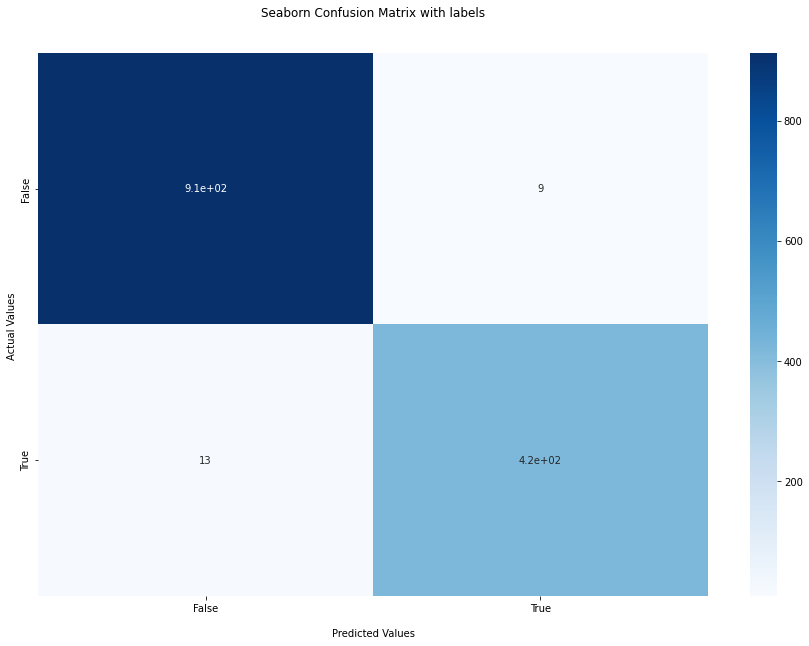

In [124]:
plt.figure(figsize=(15,10))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

DecisionTreeClassifier

In [125]:
model = DecisionTreeClassifier(min_samples_leaf=13)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print("Accuracy: " ,accuracy_score(preds, y_test))
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, preds) )
print("Balanced accuracy score: ",balanced_accuracy_score(y_test, preds) )
print("F1 score: ", f1_score(y_test, preds))

Accuracy:  0.9638643067846607
ROC_AUC_SCORE:  0.9594025210672052
Balanced accuracy score:  0.959402521067205
F1 score:  0.9437428243398392


In [132]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       922
           1       0.94      0.95      0.94       434

    accuracy                           0.96      1356
   macro avg       0.96      0.96      0.96      1356
weighted avg       0.96      0.96      0.96      1356



In [126]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, preds)
print(cf_matrix)

[[896  26]
 [ 23 411]]


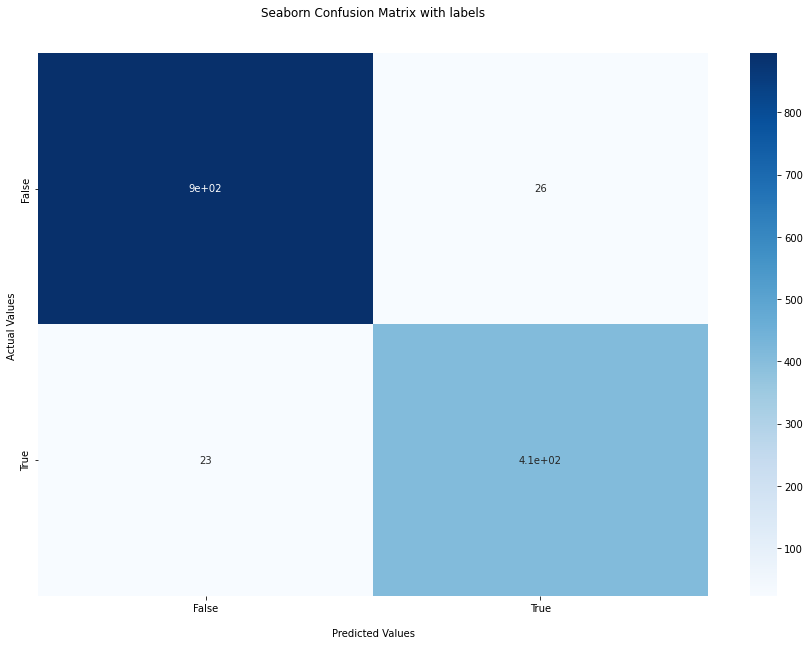

In [127]:
plt.figure(figsize=(15,10))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

 LogisticRegression

In [128]:
model_ = LogisticRegression()
model_.fit(x_train, y_train)
pred = model_.predict(x_test)
print("Accuracy: " ,accuracy_score(pred, y_test))
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, pred) )
print("Balanced accuracy score: ",balanced_accuracy_score(y_test, pred) )
print("F1 score: ", f1_score(y_test, pred))

Accuracy:  0.8569321533923304
ROC_AUC_SCORE:  0.8319871647490429
Balanced accuracy score:  0.8319871647490429
F1 score:  0.7733644859813085


In [134]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       922
           1       0.78      0.76      0.77       434

    accuracy                           0.86      1356
   macro avg       0.84      0.83      0.83      1356
weighted avg       0.86      0.86      0.86      1356



In [136]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, preds)

print(cf_matrix)

[[896  26]
 [ 23 411]]


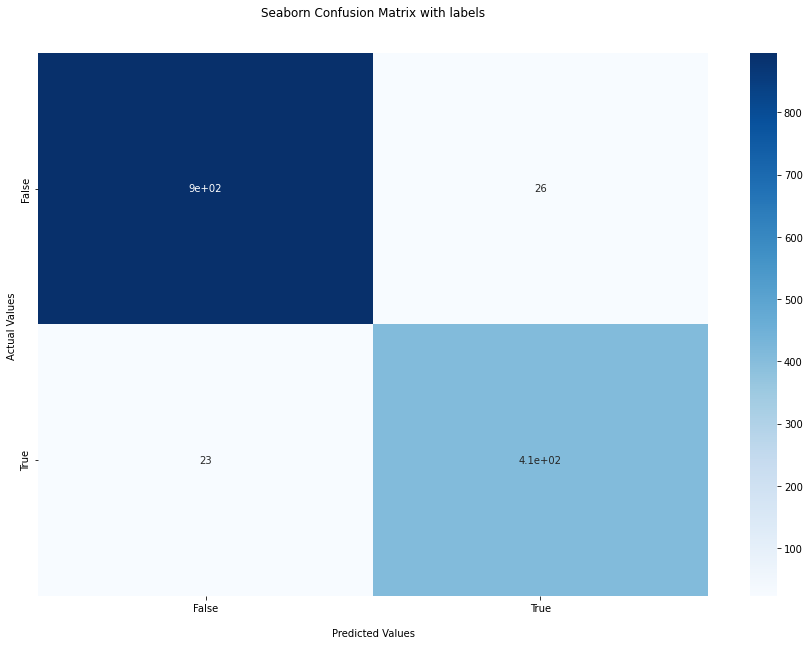

In [137]:
plt.figure(figsize=(15,10))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

RandomForestClassifier

In [129]:
md = RandomForestClassifier()
md.fit(x_train, y_train)
pr = md.predict(x_test)
print("Accuracy: " ,accuracy_score(pr, y_test))
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, pr) )
print("Balanced accuracy score: ",balanced_accuracy_score(y_test, pr) )
print("F1 score: ", f1_score(y_test, pr))

Accuracy:  0.9830383480825958
ROC_AUC_SCORE:  0.9789902735987683
Balanced accuracy score:  0.9789902735987684
F1 score:  0.9733487833140209


In [135]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       922
           1       0.98      0.97      0.97       434

    accuracy                           0.98      1356
   macro avg       0.98      0.98      0.98      1356
weighted avg       0.98      0.98      0.98      1356



In [130]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pr)

print(cf_matrix)

[[913   9]
 [ 14 420]]


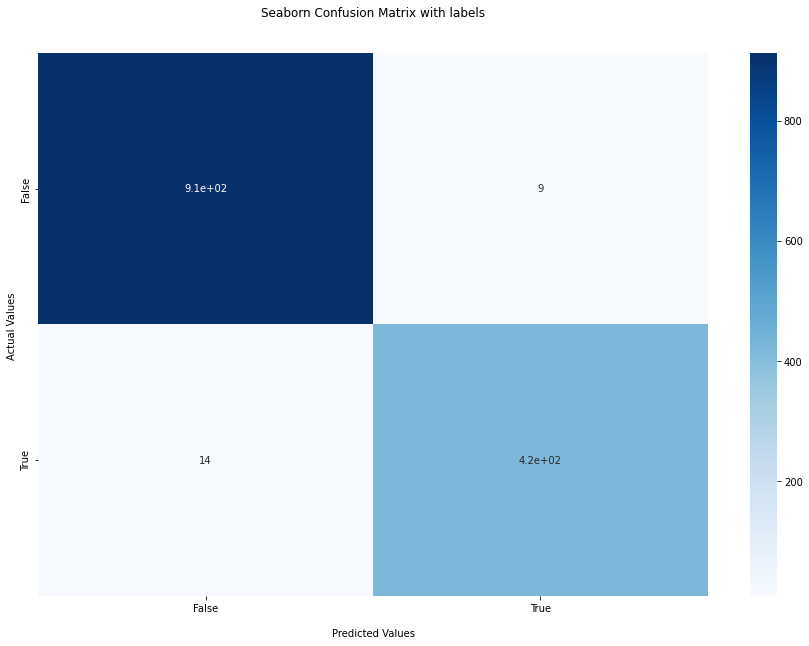

In [131]:
plt.figure(figsize=(15,10))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

LightGBM Classifier

In [140]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()

In [142]:
clf.fit(x_train, y_train)
pr = clf.predict(x_test)

In [150]:
print("Accuracy: " ,accuracy_score(pr, y_test))

Accuracy:  0.9845132743362832


In [143]:
print(classification_report(y_test, pr))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       922
           1       0.98      0.97      0.98       434

    accuracy                           0.98      1356
   macro avg       0.98      0.98      0.98      1356
weighted avg       0.98      0.98      0.98      1356



In [144]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, pr)

print(cf_matrix)

[[915   7]
 [ 14 420]]


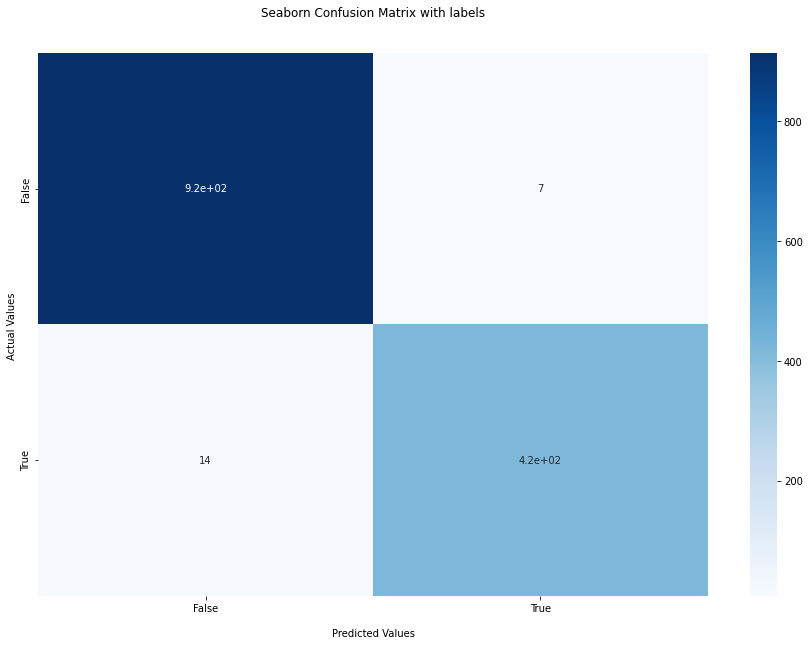

In [145]:
plt.figure(figsize=(15,10))


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` 

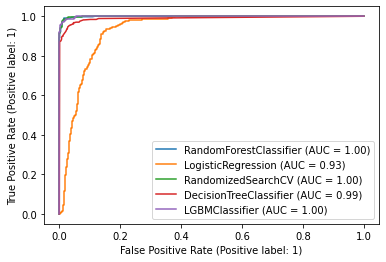

In [149]:

from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(md, x_test, y_test)
plot_roc_curve(model_, x_test, y_test, ax=disp.ax_)
plot_roc_curve(random_search, x_test, y_test, ax=disp.ax_)
plot_roc_curve(model, x_test, y_test, ax=disp.ax_)
plot_roc_curve(clf, x_test, y_test, ax=disp.ax_)